In [25]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
train=pd.read_csv("dataset_topic1.csv")

In [28]:
train.shape

(20, 10)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   student             20 non-null     int64 
 1   race                20 non-null     object
 2   gender              20 non-null     object
 3   class_performance   20 non-null     int64 
 4   learning_prefrence  20 non-null     object
 5   remembering         20 non-null     int64 
 6   understanding       20 non-null     int64 
 7   applying            20 non-null     int64 
 8   analysis            20 non-null     int64 
 9   Creating            20 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 1.7+ KB


In [30]:
train

,student,race,gender,class_performance,learning_prefrence,remembering,understanding,applying,analysis,Creating
0,1,group B,Male,1,Videos,5,9,6,7,9
1,2,group C,Female,4,PDF,5,9,6,7,6
2,3,group B,Male,4,PPT,6,3,6,5,2
3,4,group A,Male,2,Videos,7,4,4,5,10
4,5,group C,Male,1,PDF,6,2,5,4,3
5,6,group E,Male,0,Videos,4,9,7,7,9
6,7,group C,Male,4,PDF,10,6,8,8,4
7,8,group C,Female,0,PPT,10,5,4,6,5
8,9,group D,Female,1,PDF,5,3,5,4,6
9,10,group D,Male,5,PPT,7,4,5,5,9


In [31]:
train.columns

Index(['student', 'race', 'gender', 'class_performance', 'learning_prefrence',
       'remembering', 'understanding', 'applying', 'analysis', 'Creating'],
      dtype='object')

<AxesSubplot:>

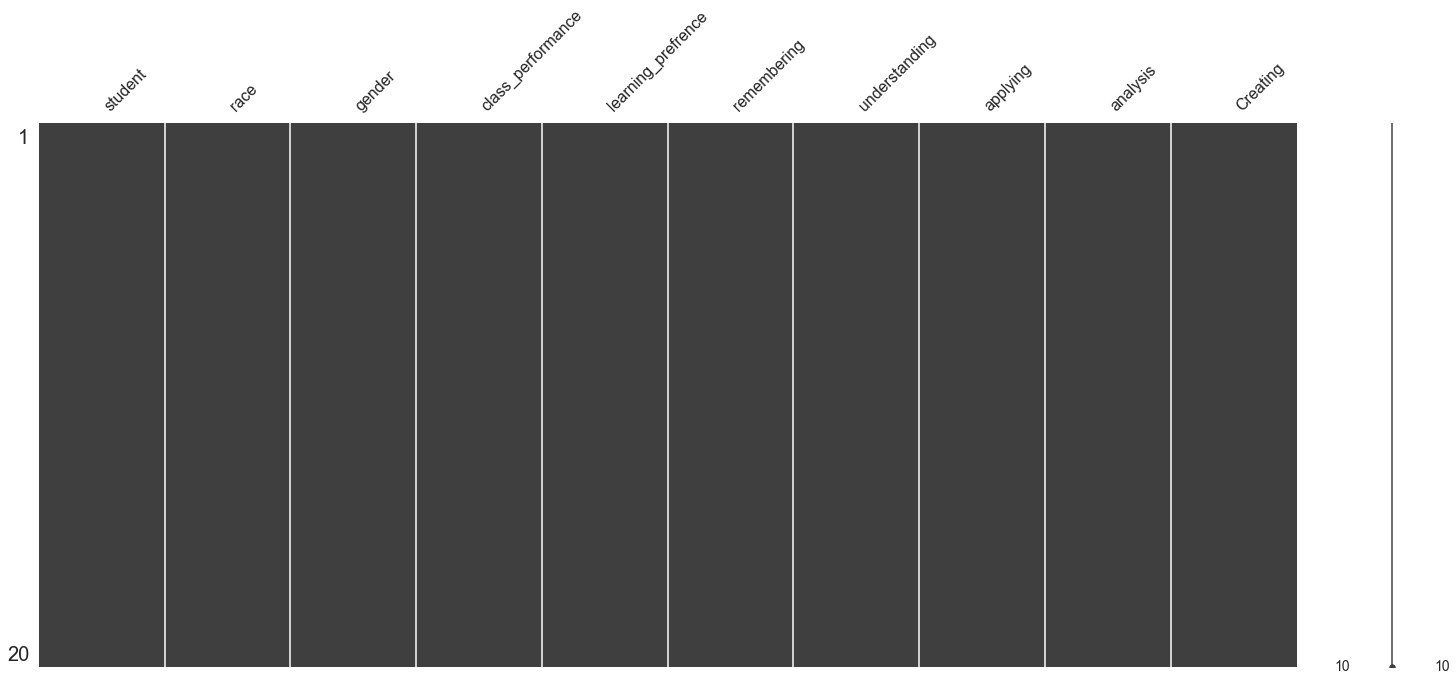

In [32]:
msno.matrix(train)

In [33]:
train.isna().sum()

student               0
race                  0
gender                0
class_performance     0
learning_prefrence    0
remembering           0
understanding         0
applying              0
analysis              0
Creating              0
dtype: int64

👆 no missing values in the data above 👆

Now, creating a new feature "Intelligence" which will help in assigning different levels of questions to different levels of intelligence

In [54]:
train['Intelligence'] = (train['remembering']+train['understanding']+train['applying']+train['analysis']+train['Creating'])/5

In [55]:
train.head(10)

,student,race,gender,class_performance,learning_prefrence,remembering,understanding,applying,analysis,Creating,Intelligence
0,1,group B,Male,1,Videos,5,9,6,7,9,7.2
1,2,group C,Female,4,PDF,5,9,6,7,6,6.6
2,3,group B,Male,4,PPT,6,3,6,5,2,4.4
3,4,group A,Male,2,Videos,7,4,4,5,10,6.0
4,5,group C,Male,1,PDF,6,2,5,4,3,4.0
5,6,group E,Male,0,Videos,4,9,7,7,9,7.2
6,7,group C,Male,4,PDF,10,6,8,8,4,7.2
7,8,group C,Female,0,PPT,10,5,4,6,5,6.0
8,9,group D,Female,1,PDF,5,3,5,4,6,4.6
9,10,group D,Male,5,PPT,7,4,5,5,9,6.0


In [56]:
train.describe()

,student,class_performance,remembering,understanding,applying,analysis,Creating,Intelligence
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,2.050000,6.950000,5.800000,5.700000,6.200000,5.050000,5.940000
std,5.91608,1.605091,2.012461,2.546411,1.341641,1.321881,3.103055,0.945015
min,1.00000,0.000000,4.000000,2.000000,4.000000,4.000000,1.000000,4.000000
25%,5.75000,1.000000,5.000000,3.750000,5.000000,5.000000,2.750000,5.400000
50%,10.50000,1.500000,7.000000,6.000000,5.500000,6.500000,5.000000,6.000000
75%,15.25000,4.000000,9.000000,9.000000,6.250000,7.000000,7.500000,6.600000
max,20.00000,5.000000,10.000000,9.000000,8.000000,8.000000,10.000000,7.200000


In [57]:
sns.set_style('dark')

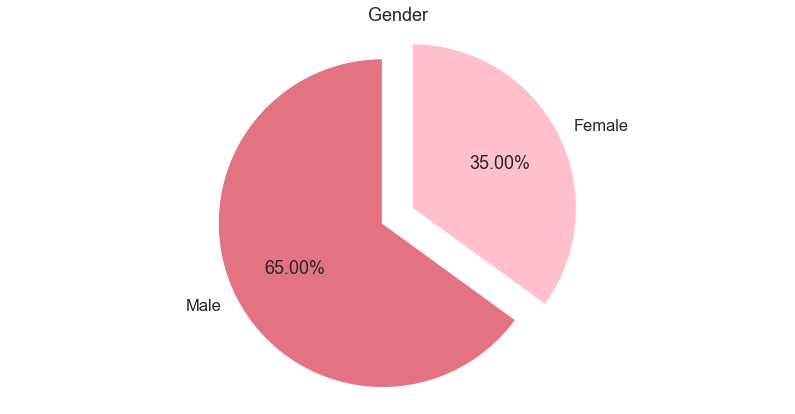

In [60]:
plt.figure(figsize=(14, 7))
labels=['Male', 'Female']
plt.pie(train['gender'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['#E37383','#FFC0CB'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

👆 Out of total number of students 65% are females while 35% are males

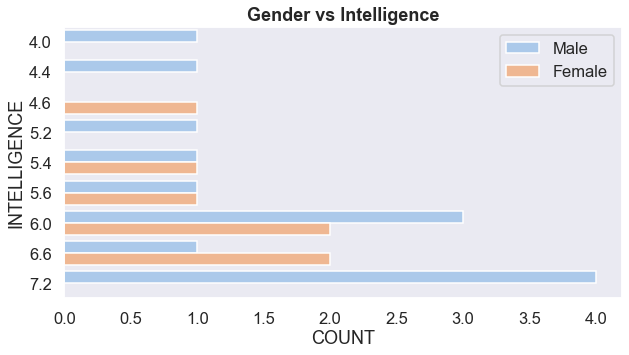

In [59]:
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=1)
sns.set_palette("pastel")
ax = sns.countplot(y="Intelligence", hue="gender", data=train)
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs Intelligence', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='INTELLIGENCE')
plt.show()

The majority of students who have high intelligence are males


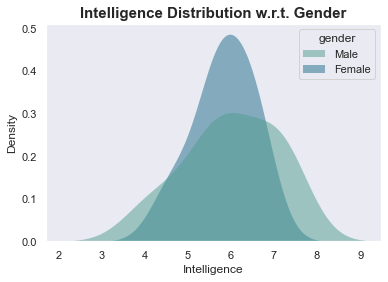

In [63]:
sns.set_context("notebook",font_scale=1)

sns.kdeplot(
   data=train, x="Intelligence", hue="gender",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.title('Intelligence Distribution w.r.t. Gender',fontsize=15, fontweight='bold')

plt.show()

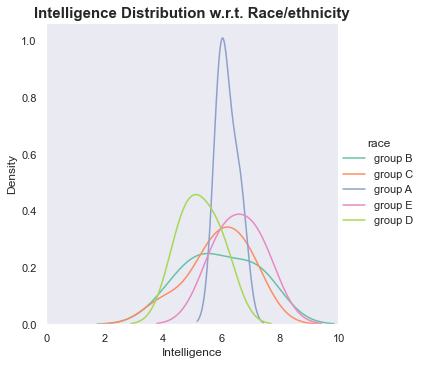

In [69]:

sns.set_palette("Set2")
(sns.FacetGrid(train,hue="race", height=5,xlim = (0,10)).map(sns.kdeplot, "Intelligence").add_legend())
plt.title('Intelligence Distribution w.r.t. Race/ethnicity',fontsize=15, fontweight='bold')

plt.show()

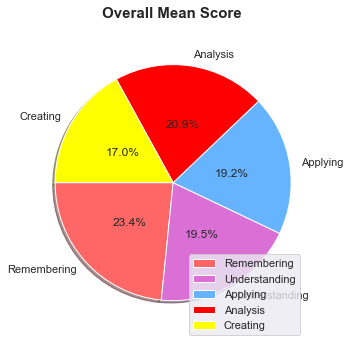

In [71]:
plt.figure(figsize=(5,5))
labels=['Remembering', 'Understanding', 'Applying','Analysis','Creating']
colors=['#ff6666','orchid','#66b3ff','red','yellow']
explode=[0,0,0,0,0]
values=[train["remembering"].mean(),train["understanding"].mean(),train["applying"].mean(),train["analysis"].mean(),train["Creating"].mean()]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True,startangle=180,pctdistance=0.5)
plt.legend(['Remembering', 'Understanding', 'Applying','Analysis','Creating'],loc='lower right')
plt.axis('equal')
plt.title(' Overall Mean Score  ',fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()